# Проверка гипотез для крупного интернет-магазина

**Цель исследования:**

Проанализировать подготовленный совместно с отделом маркетинга список гипотез для интернет-магазина с целью увеличения выручки компании.

**Ход исследования:**

Исследование состоит из следующих этапов:
- изучение общей информации о данных
- осуществление предобработки данных
- исследовательский анализ данных: приоритизация гипотез, проведение A/B теста
- подготовка заключительных выводов

## Изучение общей информации

In [1]:
#импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import datetime as dt
import numpy as np

In [2]:
#считаем данные из csv-файлов и сохраним в переменные
hypothesis = pd.read_csv('/Users/ekaterina/Desktop/Проект 9/hypothesis.csv')
orders = pd.read_csv('/Users/ekaterina/Desktop/Проект 9/orders.csv')
visitors = pd.read_csv('/Users/ekaterina/Desktop/Проект 9/visitors.csv')

рассмотрим каждый датафрейм по отдельности

In [3]:
pd.options.display.max_colwidth = 130

In [4]:
hypothesis.head(15)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [5]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


Типы данных соответствуют значениям, пропуски отсутствуют

In [6]:
orders.head(15)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


Все типы данных соответствуют значениям, кроме столбца `date` (object необходимо заменить на datetime). Пропуски отсутствуют.

In [8]:
visitors.head(15)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


In [9]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Типы данных соответствуют значениям, кроме столбца `date` (object необходимо заменить на datetime). Пропуски отсутствуют.

**Общий вывод:**

1. `hypothesis` - 9 записей, пропущенных значений нет, требуется изменить регистр в названиях столбцов

2. `orders` - 1 197 записей, пропущенных значений нет, требуется вставить нижнее подчеркивание и изменить регистр в названиях столбцов и привести столбец с датой к типу datetime

3. `visitors` - 62 записи, пропущенных значений нет, требуется привести столбец с датой к типу datetime

## Предобработка данных

### Настройка регистра

Заменим заглавные буквы на прописные в названиях столбцов, а также заменим пробелы на знак нижнего подчеркивания

In [10]:
hypothesis.columns = hypothesis.columns.str.lower()
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [11]:
orders.columns = orders.columns.str.lower()
orders = orders.rename(columns={'transactionid':'transaction_id', 'visitorid':'visitor_id'})
orders

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


Привели названия всех столбцов к нижнему и змеиному регистру

### Изменение типов данных

#### столбец  `date` (orders)

In [12]:
orders['date'] = pd.to_datetime(orders['date'])

#### столбец  `date` (visitors)

In [13]:
visitors['date'] = pd.to_datetime(visitors['date'])

Изменили типы данных у дат 

In [14]:
#проверим изменения
orders.info()
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


### Определение пропущенных значений

In [15]:
hypothesis.isna().sum()

hypothesis    0
reach         0
impact        0
confidence    0
efforts       0
dtype: int64

In [16]:
orders.isna().sum()

transaction_id    0
visitor_id        0
date              0
revenue           0
group             0
dtype: int64

In [17]:
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

Пропуски во всех датасетах отсутствуют

### Устранение явных и неявных дубликатов

Проверим данные на наличие явных дубликатов

In [18]:
hypothesis.duplicated().sum()

0

In [19]:
orders.duplicated().sum()

0

In [20]:
visitors.duplicated().sum()

0

Явные дубликаты во всех датасетах отсутствуют

Проверим данные на наличие неявных дубликатов

In [21]:
hypothesis['hypothesis'].value_counts()

Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей              1
Запустить собственную службу доставки, что сократит срок доставки заказов                                       1
Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа    1
Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар             1
Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей                                1
Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов                        1
Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию            1
Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок                1
Запустить акцию, дающую скидку на товар в день рождения                                 

In [22]:
orders['transaction_id'].value_counts()

3667963787    1
4167421281    1
2875229767    1
504373597     1
2017680897    1
             ..
1853288890    1
2084190534    1
2956594374    1
3646798055    1
3936777065    1
Name: transaction_id, Length: 1197, dtype: int64

In [23]:
orders['visitor_id'].value_counts()

4256040402    11
2458001652    11
2378935119     9
2038680547     8
199603092      5
              ..
2524310328     1
2210805728     1
2274825520     1
1831227158     1
2108080724     1
Name: visitor_id, Length: 1031, dtype: int64

Больше всего заказов (11) у пользователей с id 4256040402 и 2458001652

In [24]:
orders['date'].value_counts()

2019-08-05    48
2019-08-14    47
2019-08-12    47
2019-08-06    46
2019-08-15    46
2019-08-01    45
2019-08-28    45
2019-08-02    44
2019-08-27    44
2019-08-08    43
2019-08-19    43
2019-08-29    42
2019-08-07    42
2019-08-22    41
2019-08-09    41
2019-08-26    41
2019-08-03    40
2019-08-23    40
2019-08-10    39
2019-08-16    38
2019-08-21    37
2019-08-30    35
2019-08-13    35
2019-08-04    33
2019-08-20    32
2019-08-31    32
2019-08-24    31
2019-08-11    26
2019-08-18    26
2019-08-17    24
2019-08-25    24
Name: date, dtype: int64

Имеем данные с 01-08-2019 по 31-08-2019

In [25]:
orders['revenue'].value_counts()

990       17
390       13
890       13
400       10
1490      10
          ..
70         1
3080       1
19240      1
3890       1
202740     1
Name: revenue, Length: 713, dtype: int64

17 заказов стоимостью 990 у.е., 1 один заказ - 202 740 у.е.

In [26]:
orders['group'].value_counts()

B    640
A    557
Name: group, dtype: int64

In [27]:
#проверим, есть ли пользователи, попавшие в обе группы
both_groups = orders\
    .groupby('visitor_id')\
    .agg({'group': 'nunique'})\
    .query('group > 1')\
    .reset_index()

display(both_groups)
display(len(both_groups))

,visitor_id,group
0,8300375,2
1,199603092,2
2,232979603,2
3,237748145,2
4,276558944,2
5,351125977,2
6,393266494,2
7,457167155,2
8,471551937,2
9,477780734,2


58

58 пользователей находятся одновременно в обеих группах. Это может негативно отразиться на дальнейшем анализе: будут некорректно отображены данные на графиках и высчитаны статистические значимости. Следовательно, удалим эти данные (5% от 1 139).

In [28]:
duplicate_users = both_groups['visitor_id'].tolist()
orders = orders.query('visitor_id not in @duplicate_users')

In [29]:
#проверим изменения
orders['group'].value_counts()

B    548
A    468
Name: group, dtype: int64

In [30]:
visitors['date'].value_counts()

2019-08-01    2
2019-08-17    2
2019-08-30    2
2019-08-29    2
2019-08-28    2
2019-08-27    2
2019-08-26    2
2019-08-25    2
2019-08-24    2
2019-08-23    2
2019-08-22    2
2019-08-21    2
2019-08-20    2
2019-08-19    2
2019-08-18    2
2019-08-16    2
2019-08-02    2
2019-08-15    2
2019-08-14    2
2019-08-13    2
2019-08-12    2
2019-08-11    2
2019-08-10    2
2019-08-09    2
2019-08-08    2
2019-08-07    2
2019-08-06    2
2019-08-05    2
2019-08-04    2
2019-08-03    2
2019-08-31    2
Name: date, dtype: int64

Временной промежуток соответствует промежутку в датасете `orders`

In [31]:
visitors['group'].value_counts()

A    31
B    31
Name: group, dtype: int64

In [32]:
visitors['visitors'].value_counts()

490    2
610    2
654    2
718    2
544    1
581    1
509    1
770    1
707    1
655    1
709    1
369    1
721    1
543    1
769    1
746    1
413    1
699    1
421    1
737    1
487    1
560    1
656    1
650    1
546    1
378    1
679    1
676    1
720    1
713    1
719    1
619    1
361    1
507    1
717    1
756    1
667    1
644    1
617    1
406    1
595    1
748    1
735    1
628    1
412    1
577    1
668    1
502    1
575    1
646    1
609    1
468    1
395    1
621    1
722    1
711    1
594    1
531    1
Name: visitors, dtype: int64

Неявные дубликаты во всех датасетах отсутствуют, кроме пользователей, попавших в обе группы в orders

### Проверка на наличие аномалий

In [33]:
hypothesis.describe()

,reach,impact,confidence,efforts
count,9.000000,9.000000,9.000000,9.000000
mean,4.777778,4.777778,5.555556,4.888889
std,3.153481,3.192874,3.045944,2.803767
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,7.000000,5.000000
75%,8.000000,7.000000,8.000000,6.000000
max,10.000000,10.000000,9.000000,10.000000


In [34]:
orders['revenue'].describe()

count    1.016000e+03
mean     8.300815e+03
std      4.212199e+04
min      5.000000e+01
25%      1.190000e+03
50%      2.955000e+03
75%      8.134250e+03
max      1.294500e+06
Name: revenue, dtype: float64

Имеется аномально высокая выручка с заказа, как было замечено ранее. Возьмем его в поле зрения 

In [35]:
visitors.describe()

,visitors
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


В целом, данные корректны

**Вывод:**

**1. Изменены типы данных:**
- `date` (orders) - с объектного на дату
- `date` (visitors) - с объектного на дату 

**2. Настроен нижний регистр в названиях столбцов**

**3. Соблюден змеиный регистр в названиях столбцов**

**4. Проверены данные на пропущенные значения, наличие явных и неявных дубликатов, аномалий:** 

- обнаружен возможный выброс в столбце `revenue` (orders)

- удалены дубликаты пользователей, находящихся в обеих группах orders

## Исследовательский анализ данных

### Приоритизация гипотез

#### Фреймворк ICE

Фреймворк ICE - один из наиболее часто используемых способов приоритизации гипотез.

*Impact (влияние на пользователей) x Confidence (уверенность в направлении влияния) / Efforts (необходимые усилия для проверки гипотезы)*       

In [36]:
hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
round(hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False), 2)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Наиболее перспективные гипотезы: 8, 0 и 7

#### Фреймворк RICE

Фреймворк RICE - более продвинутая версия фреймворка ICE, который позволяет при определении приоритета гипотез учитывать значимый фактор охвата (reach) гипотезой пользователей. 

                                Reach x Impact x Confidence / Efforts

Вследствие его учета общие черты фреймворка ICE могут сохраняться в списке гипотез по фреймворку RICE, но вносятся и существенные изменения, благодаря рассмотрению параметра охвата.

In [37]:
hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Наиболее перспективные гипотезы: 7, 2 и 0

**Вывод:**

В ходе приоритизации гипотез удалось прийти к следующим выводам:

1. Приоритет гипотез 7 и 0 подтверждается двумя фреймворками, тогда как 8 гипотеза лидируют лишь в одном фреймворке ICE, а 2 - в RICE.

2. Повысившийся результат гипотезы 7 объясняется ее значительным охватом (10), а гипотеза 0 занимает третье место вследствие ее небольшого охвата (3).

3. Гипотеза 8 теряет свое лидерскую позицию также вследствие небольшого охвата (5) по сравнению с другими гипотезами. Тогда как гипотеза 2 с охватом в 8 входит в число приоритетных гипотез.

Таким образом, наиболее перспективные гипотезы возьмем по фреймворку RICE с учетом не только силы, но и охвата гипотезой пользователей: 
* *Гипотеза 7* - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок, 
* *Гипотеза 2* - Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа, 
* *Гипотеза 0* - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей, 
* *Гипотеза 6* - Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию,
* *Гипотеза 8* - Запустить акцию, дающую скидку на товар в день рождения.

### Анализ A/B теста

#### Подготовка "сырых" данных к анализу

In [38]:
#создадим массив уникальных пар значений дат и групп теста
dates_groups = orders[['date','group']].drop_duplicates() 

In [39]:
#агрегируем значения по заказам
orders_agg = dates_groups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date': 'max', 'group': 'max', 'transaction_id': 'nunique', 'visitor_id': 'nunique', 'revenue': 'sum'}), axis=1).sort_values(by=['date', 'group'])

In [40]:
#агрегируем значения по посетителям
visitors_agg = dates_groups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]\
.agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}), axis=1).sort_values(by=['date', 'group'])                                 

In [41]:
#объединим кумулятивные данные и переименуем столбцы
cum_data = orders_agg.merge(visitors_agg, left_on=['date', 'group'], right_on=['date', 'group'])
cum_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

display(cum_data.head(10))

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845
5,2019-08-03,B,54,53,288850,1803
6,2019-08-04,A,77,71,388030,2562
7,2019-08-04,B,68,66,385740,2573
8,2019-08-05,A,99,92,474413,3318
9,2019-08-05,B,89,87,475648,3280


In [42]:
#проверим мин и макс даты в кумулятивных данных
min_analysis_date = cum_data['date'].min()
max_analysis_date = cum_data['date'].max()

display(min_analysis_date)
display(max_analysis_date)

Timestamp('2019-08-01 00:00:00')

Timestamp('2019-08-31 00:00:00')

Данные совпадают с исходным датафреймом (2019-08-01 по 2019-08-31)

In [43]:
#датафрейм по группе A
cum_rev_A = cum_data[cum_data['group'] == 'A'][['date', 'revenue', 'orders']]
cum_rev_A.head(10)

,date,revenue,orders
0,2019-08-01,142779,23
2,2019-08-02,234381,42
4,2019-08-03,346854,66
6,2019-08-04,388030,77
8,2019-08-05,474413,99
10,2019-08-06,515332,114
12,2019-08-07,638580,130
14,2019-08-08,727219,144
16,2019-08-09,861456,155
18,2019-08-10,1013731,170


In [44]:
#датафрейм по группе B
cum_rev_B = cum_data[cum_data['group'] == 'B'][['date', 'revenue', 'orders']]
cum_rev_B.head(10)

,date,revenue,orders
1,2019-08-01,59758,17
3,2019-08-02,221801,40
5,2019-08-03,288850,54
7,2019-08-04,385740,68
9,2019-08-05,475648,89
11,2019-08-06,690490,112
13,2019-08-07,909654,135
15,2019-08-08,1059795,157
17,2019-08-09,1162961,176
19,2019-08-10,1268123,198


#### График кумулятивной выручки

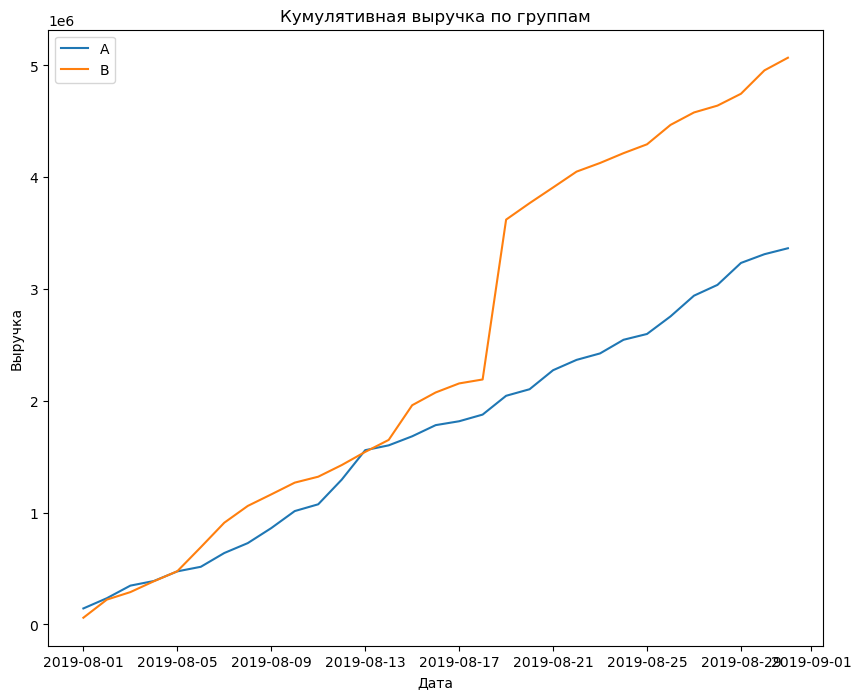

In [45]:
plt.figure(figsize=(10,8))
plt.ylabel('Выручка')
plt.xlabel('Дата')
plt.title('Кумулятивная выручка по группам')
#график группы А
plt.plot(cum_rev_A['date'], cum_rev_A['revenue'], label='A')
#график группы В
plt.plot(cum_rev_B['date'], cum_rev_B['revenue'], label='B')
plt.legend()
plt.show()

Выручка до 17.08 равномерно росла в обеих группах, имелись точки соприкосновения. Далее произошел резкий скачок выручки группы В с 2 до приблизительно 3,8 и продолжил расти. Идентично продолжила возрастать выручка группы А, но на более низком уровне.

Причиной такого роста может быть аномальный по размеру выручки заказ, который мы обнаружили ранее (заказ стоимостью 202 740 у.е.) или общий всплеск количества заказов.

#### График кумулятивного среднего чека

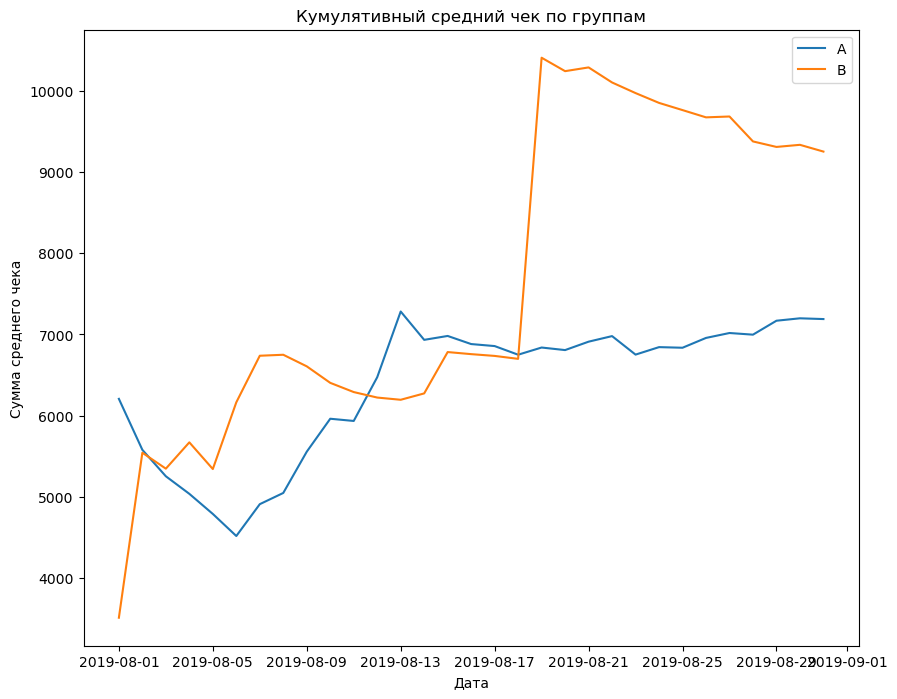

In [46]:
plt.figure(figsize=(10,8))
plt.ylabel('Сумма среднего чека')
plt.xlabel('Дата')
plt.title('Кумулятивный средний чек по группам')
#график группы А
plt.plot(cum_rev_A['date'], cum_rev_A['revenue'] / cum_rev_A['orders'], label='A')
#график группы B
plt.plot(cum_rev_B['date'], cum_rev_B['revenue'] / cum_rev_B['orders'], label='B')
plt.legend()
plt.show()

Кумулятивное значение среднего чека также колеблется. В общих чертах видны сходства с графиком кумулятивной выручки, но также имеются различия. 

До резкого скачка 17.08 отметим рост размера среднего чека группы В при проседании значения у группы А. Далее обе группы выровнялись в значениях вблизи роста показателя. 

После скачка наблюдаем понижение среднего чека группы В при небольшом возрастании значения группы А.

Весомую роль играют аномальные значения, результаты без которых мы проанализируем позже. 

#### График относительного изменения кумулятивного среднего чека

In [47]:
#объединим кумулятивные данные
cum_rev_merged = cum_rev_A.merge(cum_rev_B, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
cum_rev_merged.head(10)

,date,revenueA,ordersA,revenueB,ordersB
0,2019-08-01,142779,23,59758,17
1,2019-08-02,234381,42,221801,40
2,2019-08-03,346854,66,288850,54
3,2019-08-04,388030,77,385740,68
4,2019-08-05,474413,99,475648,89
5,2019-08-06,515332,114,690490,112
6,2019-08-07,638580,130,909654,135
7,2019-08-08,727219,144,1059795,157
8,2019-08-09,861456,155,1162961,176
9,2019-08-10,1013731,170,1268123,198


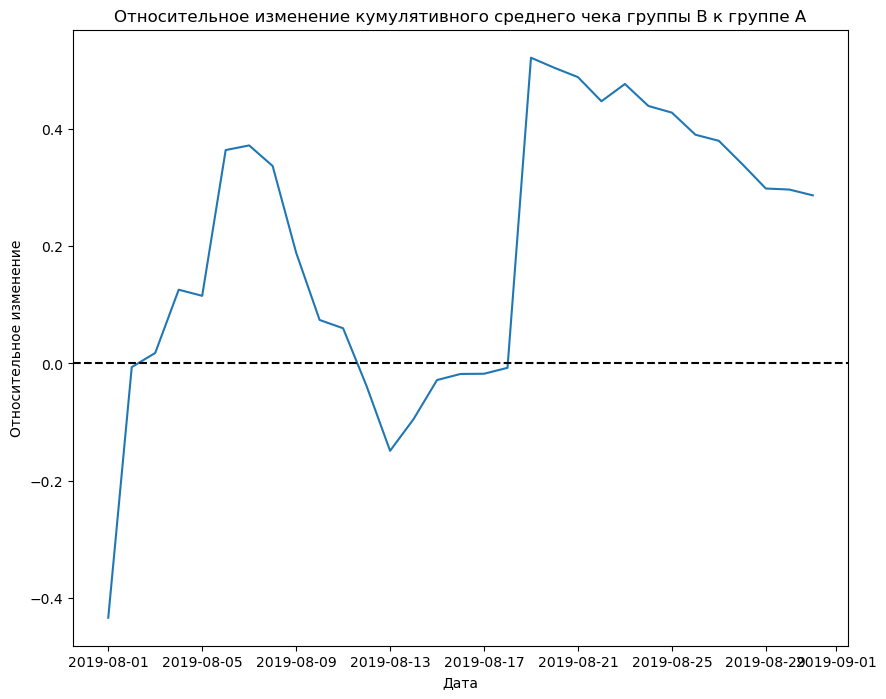

In [48]:
plt.figure(figsize=(10,8))
plt.ylabel('Относительное изменение')
plt.xlabel('Дата')
plt.title('Относительное изменение кумулятивного среднего чека группы В к группе А')
#график отношения средних чеков
plt.plot(cum_rev_merged['date'], (cum_rev_merged['revenueB'] / cum_rev_merged['ordersB']) / (cum_rev_merged['revenueA'] / cum_rev_merged['ordersA'])-1)

#добавим ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

Снова наблюдаем резкие колебания. Рост среднего чека группы В приблизительно 7-8 августа; падение 13.08, взлет приблизительно 21.08 и последующее снижение. 

Однозначно имеются крупные заказы-аномалии.

#### График кумулятивного среднего количества заказов на пользователя

In [49]:
#посчитаем кумулятивное среднее к уникальным пользователям
cum_data['avr_unique'] = cum_data['orders'] / cum_data['visitors']
cum_data.head(10)

,date,group,orders,buyers,revenue,visitors,avr_unique
0,2019-08-01,A,23,19,142779,719,0.031989
1,2019-08-01,B,17,17,59758,713,0.023843
2,2019-08-02,A,42,36,234381,1338,0.031390
3,2019-08-02,B,40,39,221801,1294,0.030912
4,2019-08-03,A,66,60,346854,1845,0.035772
5,2019-08-03,B,54,53,288850,1803,0.029950
6,2019-08-04,A,77,71,388030,2562,0.030055
7,2019-08-04,B,68,66,385740,2573,0.026428
8,2019-08-05,A,99,92,474413,3318,0.029837
9,2019-08-05,B,89,87,475648,3280,0.027134


In [50]:
#посчитаем кумулятивное среднее ко всем пользователям
cum_data['avr_all'] = cum_data['orders'] / visitors['visitors']
cum_data.head(10)

,date,group,orders,buyers,revenue,visitors,avr_unique,avr_all
0,2019-08-01,A,23,19,142779,719,0.031989,0.031989
1,2019-08-01,B,17,17,59758,713,0.023843,0.027464
2,2019-08-02,A,42,36,234381,1338,0.031390,0.082840
3,2019-08-02,B,40,39,221801,1294,0.030912,0.055788
4,2019-08-03,A,66,60,346854,1845,0.035772,0.087302
5,2019-08-03,B,54,53,288850,1803,0.029950,0.080960
6,2019-08-04,A,77,71,388030,2562,0.030055,0.119565
7,2019-08-04,B,68,66,385740,2573,0.026428,0.111475
8,2019-08-05,A,99,92,474413,3318,0.029837,0.160454
9,2019-08-05,B,89,87,475648,3280,0.027134,0.219212


In [51]:
#данные по группе А
cum_data_A = cum_data[cum_data['group'] == 'A']

#данные по группе В
cum_data_B = cum_data[cum_data['group'] == 'B']

display(cum_data_A.head(10))
display(cum_data_B.head(10))

,date,group,orders,buyers,revenue,visitors,avr_unique,avr_all
0,2019-08-01,A,23,19,142779,719,0.031989,0.031989
2,2019-08-02,A,42,36,234381,1338,0.031390,0.082840
4,2019-08-03,A,66,60,346854,1845,0.035772,0.087302
6,2019-08-04,A,77,71,388030,2562,0.030055,0.119565
8,2019-08-05,A,99,92,474413,3318,0.029837,0.160454
10,2019-08-06,A,114,104,515332,3985,0.028607,0.158774
12,2019-08-07,A,130,120,638580,4629,0.028084,0.173797
14,2019-08-08,A,144,133,727219,5239,0.027486,0.229299
16,2019-08-09,A,155,143,861456,5856,0.026469,0.376214
18,2019-08-10,A,170,158,1013731,6262,0.027148,0.338645


,date,group,orders,buyers,revenue,visitors,avr_unique,avr_all
1,2019-08-01,B,17,17,59758,713,0.023843,0.027464
3,2019-08-02,B,40,39,221801,1294,0.030912,0.055788
5,2019-08-03,B,54,53,288850,1803,0.029950,0.080960
7,2019-08-04,B,68,66,385740,2573,0.026428,0.111475
9,2019-08-05,B,89,87,475648,3280,0.027134,0.219212
11,2019-08-06,B,112,109,690490,3935,0.028463,0.188235
13,2019-08-07,B,135,132,909654,4644,0.029070,0.183673
15,2019-08-08,B,157,154,1059795,5298,0.029634,0.434903
17,2019-08-09,B,176,173,1162961,5908,0.029790,0.263473
19,2019-08-10,B,198,195,1268123,6277,0.031544,0.344348


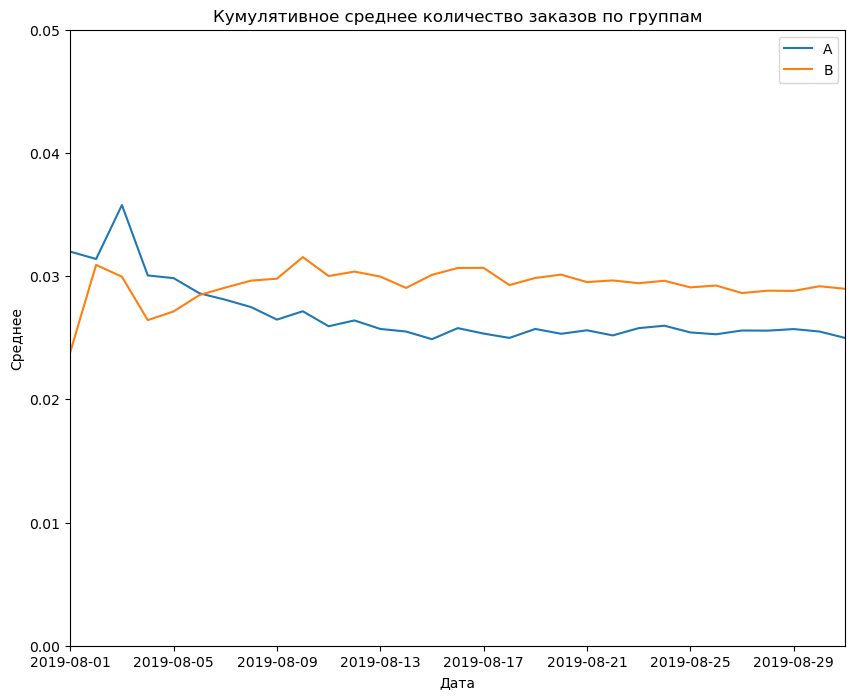

In [52]:
#данные по среднему к уникальным пользователям

plt.figure(figsize=(10,8))
plt.ylabel('Среднее')
plt.xlabel('Дата')
plt.title('Кумулятивное среднее количество заказов по группам')
#график группы А
plt.plot(cum_data_A['date'], cum_data_A['avr_unique'], label='A')
#график группы B
plt.plot(cum_data_B['date'], cum_data_B['avr_unique'], label='B')
plt.legend()
#зададим масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), 0, 0.05])
plt.show()

В начале теста группа А имела большее среднее, но группа В далее выровнялась выше уровня группы A. До конца теста оба группы зафиксировались на своих уровнях и двигались параллельно друг другу.

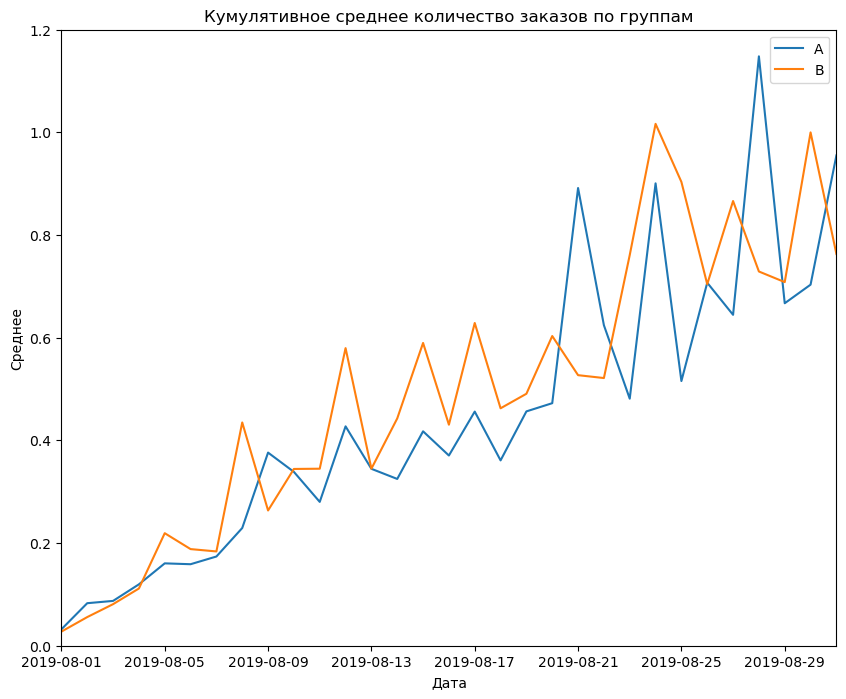

In [53]:
#данные по среднему ко всем пользователям

plt.figure(figsize=(10,8))
plt.ylabel('Среднее')
plt.xlabel('Дата')
plt.title('Кумулятивное среднее количество заказов по группам')
#график группы А
plt.plot(cum_data_A['date'], cum_data_A['avr_all'], label='A')
#график группы B
plt.plot(cum_data_B['date'], cum_data_B['avr_all'], label='B')
plt.legend()
#зададим масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), 0, 1.2])
plt.show()

В начале теста обе группы имели одинаковый уровень кумулятивного среднего количества заказов. До 21.08 среднее группы В достигало более высоких результатов, но постенно шло на спад. После 21.08 группа А, благодаря резкому скачку, обошла группу В. Однако, в общем и целом, обе группы, имея пики среднего, не дали четкого понимания и фиксации своиз результатов.

#### График относительного изменения кумулятивного среднего количества заказов на пользователя

In [54]:
#объединим кумулятивное среднее к уникальным пользователям
cum_conv_merged = cum_data_A[['date', 'avr_unique']].merge(cum_data_B[['date', 'avr_unique']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
cum_conv_merged.head(10)

,date,avr_uniqueA,avr_uniqueB
0,2019-08-01,0.031989,0.023843
1,2019-08-02,0.031390,0.030912
2,2019-08-03,0.035772,0.029950
3,2019-08-04,0.030055,0.026428
4,2019-08-05,0.029837,0.027134
5,2019-08-06,0.028607,0.028463
6,2019-08-07,0.028084,0.029070
7,2019-08-08,0.027486,0.029634
8,2019-08-09,0.026469,0.029790
9,2019-08-10,0.027148,0.031544


In [55]:
#объединим кумулятивное среднее ко всем пользователям
cum_avr_merged = cum_data_A[['date', 'avr_all']].merge(cum_data_B[['date', 'avr_all']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
cum_avr_merged.head(10)

,date,avr_allA,avr_allB
0,2019-08-01,0.031989,0.027464
1,2019-08-02,0.082840,0.055788
2,2019-08-03,0.087302,0.080960
3,2019-08-04,0.119565,0.111475
4,2019-08-05,0.160454,0.219212
5,2019-08-06,0.158774,0.188235
6,2019-08-07,0.173797,0.183673
7,2019-08-08,0.229299,0.434903
8,2019-08-09,0.376214,0.263473
9,2019-08-10,0.338645,0.344348


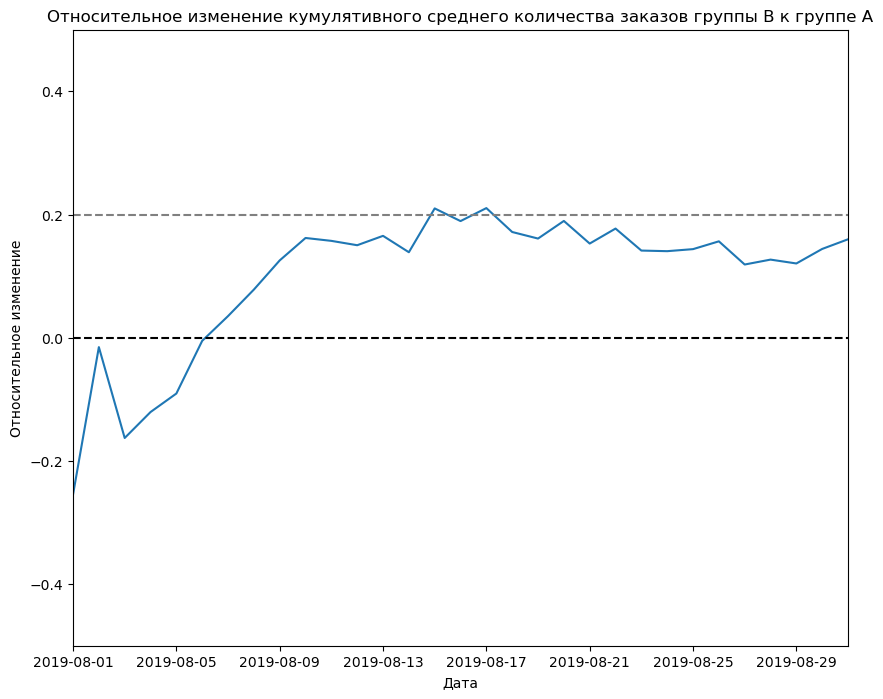

In [56]:
#данные по среднему к уникальным пользователям

plt.figure(figsize=(10,8))
plt.ylabel('Относительное изменение')
plt.xlabel('Дата')
plt.title('Относительное изменение кумулятивного среднего количества заказов группы В к группе А')
plt.plot(cum_conv_merged['date'], cum_conv_merged['avr_uniqueB'] / cum_conv_merged['avr_uniqueA']-1)
#зададим ось X и масштаб осей
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), -0.5, 0.5])
plt.show()

В начале тесте группа В отстает от значений группы А. Далее значения группы В превосходят другую и фиксируются приблизительно на одном уровне. Однако группа В остается между 0 и 20%, имея несколько достижений прироста в 20%.

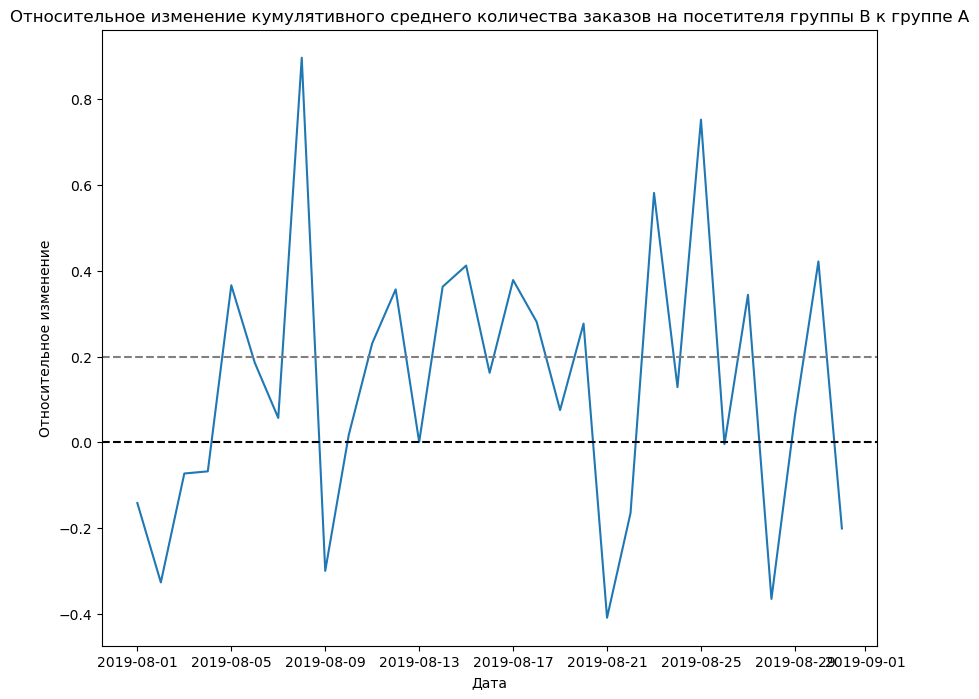

In [57]:
#данные по среднему ко всем пользователям

plt.figure(figsize=(10,8))
plt.ylabel('Относительное изменение')
plt.xlabel('Дата')
plt.title('Относительное изменение кумулятивного среднего количества заказов на посетителя группы В к группе А')
plt.plot(cum_avr_merged['date'], cum_avr_merged['avr_allB'] / cum_avr_merged['avr_allA']-1)
#зададим ось X и масштаб осей
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.show()

Группе В свойственны резкие скачки кумулятивного среднего количества заказов на всем протяжении теста. Имеются положительные пиковые значения (окло 85%, 75%) и отрицательные значения (-40%, -35%). Однако большую часть теста группа В находится между 0% и 20% и выше с несколько отрицательными значениями. Однозначных выводов также вывести не удается.

#### Гистограмма и точечный график количества заказов по пользователям

In [58]:
#посчитаем количество заказов по пользователям
orders_visitors = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)
#переименуем названия столбцов
orders_visitors.columns = ('visitor_id', 'orders')
print(orders_visitors.sort_values(by='orders', ascending=False).head(15))

     visitor_id  orders
908  3967698036       3
55    249864742       3
478  2108163459       3
687  2988190573       3
890  3908431265       3
138   611059232       3
632  2742574263       3
157   678354126       2
323  1404560065       2
452  1985475298       2
118   522292794       2
628  2733145037       2
634  2744017357       2
407  1772171838       2
548  2397843657       2


Максимальное число заказов у пользователей за месяц - 3

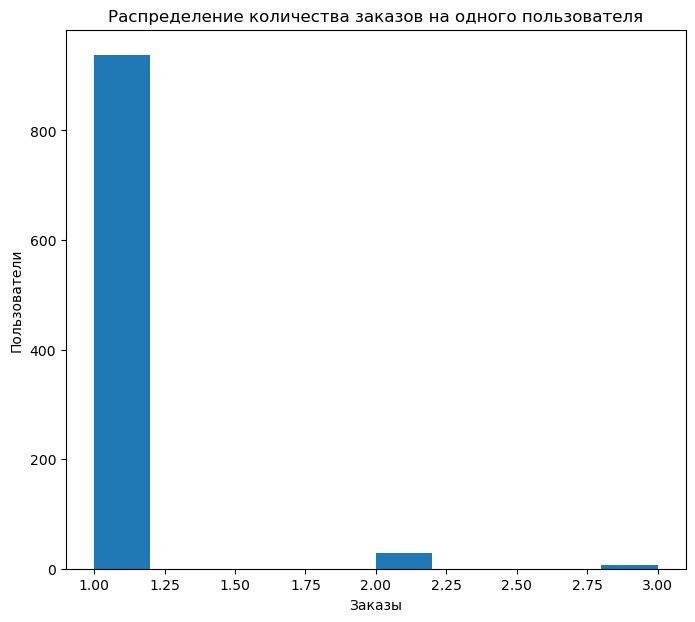

In [59]:
plt.figure(figsize=(8,7))
plt.ylabel('Пользователи')
plt.xlabel('Заказы')
plt.title('Распределение количества заказов на одного пользователя')
#построим гистограмму
plt.hist(orders_visitors['orders'])
plt.show()

Большинство пользователей совершило один заказ, но есть те, кто купили товары и два, и три раза. Определим количество таких пользователей.

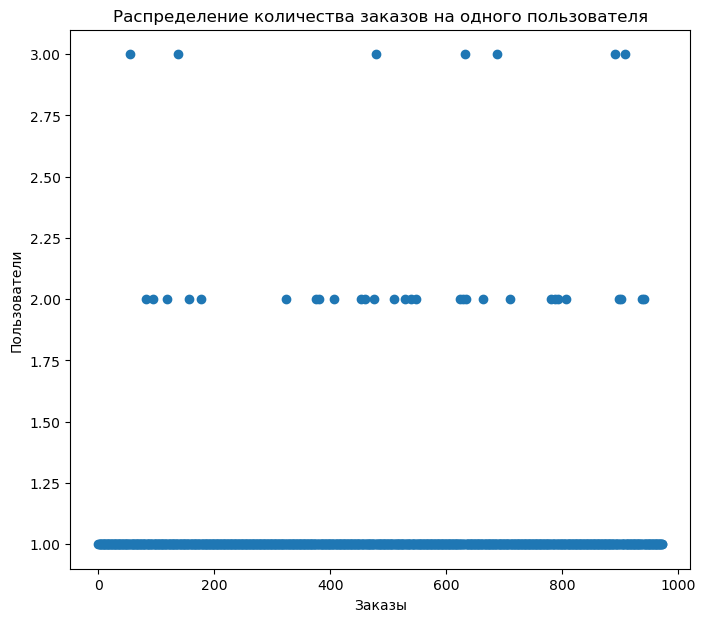

In [60]:
#сгенерируем номера наблюдений для оси X
x_values = pd.Series(range(0, len(orders_visitors)))

plt.figure(figsize=(8,7))
plt.ylabel('Пользователи')
plt.xlabel('Заказы')
plt.title('Распределение количества заказов на одного пользователя')
#построим точечный график
plt.scatter(x_values, orders_visitors['orders'])
plt.show()

Данные с гистограммы подтверждаются. Большинство пользователей совершили заказ один раз. Пользователей с двумя и тремя заказами могут быть аномальными значениями вследствие их небольшого количества.

Для понимания, много ли совершить два или три заказа, посчитаем выборочные перцентили.  

#### 95-й и 99-й перцентили количества заказов на пользователя

In [61]:
print(np.percentile(orders_visitors['orders'], [90, 95, 99]))

[1. 1. 2.]


Не более 10% пользователей купили больше одного раза, а также не более 5% пользователей совершили заказ более одного раза. Тогда как не более 1% пользователей купили два раза. Следовательно, двойные заказы можем считать аномальными.

####  Гистограмма и точечный график стоимостей заказов

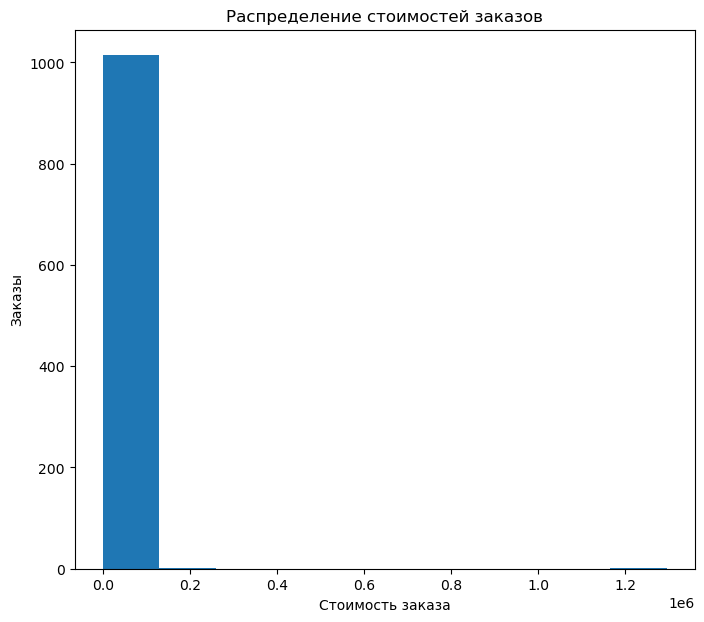

In [62]:
plt.figure(figsize=(8,7))
plt.ylabel('Заказы')
plt.xlabel('Стоимость заказа')
plt.title('Распределение стоимостей заказов')
plt.hist(orders['revenue'])
plt.show()

Сумма большинства заказов меньше 200 у.е. Присутствуют также заказы стоимостью в 200 у.е., возможно, аномальные. Распределение не нормальное.

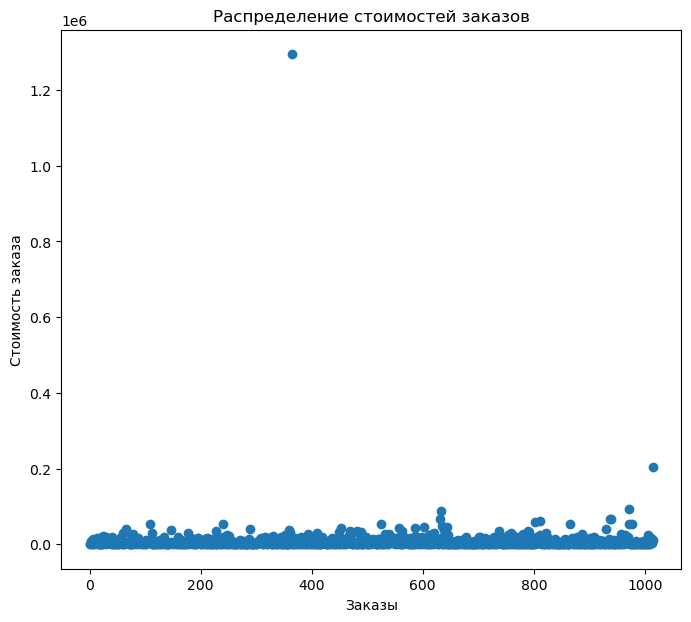

In [63]:
x_values = pd.Series(range(0, len(orders['revenue'])))

plt.figure(figsize=(8,7))
plt.ylabel('Стоимость заказа')
plt.xlabel('Заказы')
plt.title('Распределение стоимостей заказов')
plt.scatter(x_values, orders['revenue'])
plt.show()

Стоимость большинства заказов колеблется в пределах 130-150 у.е. Тогда как выбивается заказ за 202 у.е., а также заказ за 1 300 у.е.

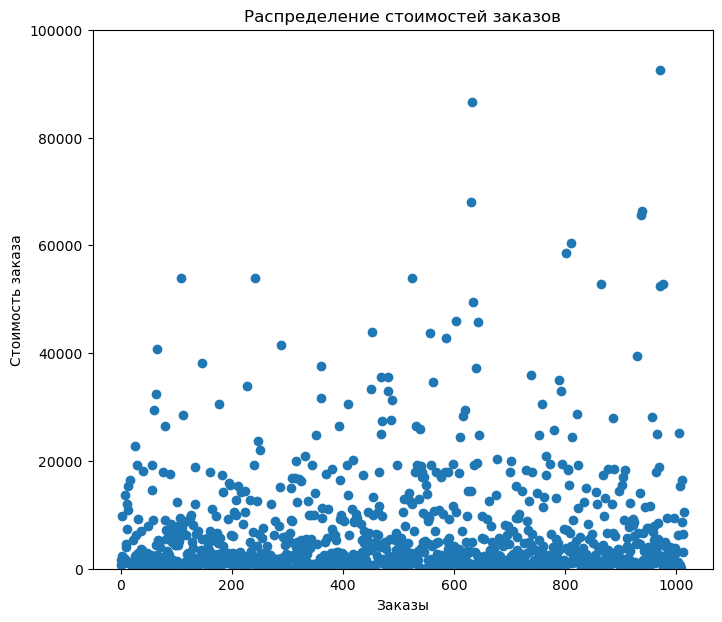

In [64]:
#посмотрим на график с ограничением значения по оси Y
plt.figure(figsize=(8,7))
plt.ylabel('Стоимость заказа')
plt.ylim(0, 100000)
plt.xlabel('Заказы')
plt.title('Распределение стоимостей заказов')
plt.scatter(x_values, orders['revenue'])
plt.show()

Действительно, в основном пользователи покупали на сумму до 100 000 у.е. Остальные заказы уже выбивающиеся

#### 95-й и 99-й перцентили стоимости заказов

In [65]:
print(np.percentile(orders['revenue'], [90, 95, 99]))

[17990. 26785. 53904.]


Не более 10% пользователей купили больше, чем на 17 990 у.е.

Не более 5% пользователей совершили заказ на более, чем 26 785 у.е. 

Не более 1% пользователей купили дороже 53 904 у.е.

Значит примем за **границы аномалий** 99-й перцентиль:

* количество заказов более двух 

* стоимость заказа выше 54 000 у.е.

#### Подготовка "сырых" данных к анализу

In [66]:
#создадим переменную для пользователей группы А на каждую дату
visitors_day_A = visitors[visitors['group'] == 'A'][['date', 'visitors']]

#переименуем столбцы
visitors_day_A.columns = ['date', 'visitors_per_date_A']

#создадим переменную с накопительным количеством пользователей на каждую дату
cum_visitors_day_A = visitors_day_A.apply(
    lambda x: visitors_day_A[visitors_day_A['date'] <= x['date']]
    .agg({'date': 'max', 'visitors_per_date_A': 'sum'}), axis=1)

#переименуем столбцы
cum_visitors_day_A.columns = ['date', 'cum_visitors_A']

display(visitors_day_A.head(10))
display(cum_visitors_day_A.head(10))

,date,visitors_per_date_A
0,2019-08-01,719
1,2019-08-02,619
2,2019-08-03,507
3,2019-08-04,717
4,2019-08-05,756
5,2019-08-06,667
6,2019-08-07,644
7,2019-08-08,610
8,2019-08-09,617
9,2019-08-10,406


,date,cum_visitors_A
0,2019-08-01,719
1,2019-08-02,1338
2,2019-08-03,1845
3,2019-08-04,2562
4,2019-08-05,3318
5,2019-08-06,3985
6,2019-08-07,4629
7,2019-08-08,5239
8,2019-08-09,5856
9,2019-08-10,6262


In [67]:
#создадим переменную для пользователей группы B на каждую дату
visitors_day_B = visitors[visitors['group'] == 'B'][['date', 'visitors']]

#переименуем столбцы
visitors_day_B.columns = ['date', 'visitors_per_date_B']

#создадим переменную с накопительным количеством пользователей на каждую дату
cum_visitors_day_B = visitors_day_B.apply(
    lambda x: visitors_day_B[visitors_day_B['date'] <= x['date']]
    .agg({'date': 'max', 'visitors_per_date_B': 'sum'}), axis=1)

#переименуем столбцы
cum_visitors_day_B.columns = ['date', 'cum_visitors_B']


display(visitors_day_B.head(10))
display(cum_visitors_day_B.head(10))

,date,visitors_per_date_B
31,2019-08-01,713
32,2019-08-02,581
33,2019-08-03,509
34,2019-08-04,770
35,2019-08-05,707
36,2019-08-06,655
37,2019-08-07,709
38,2019-08-08,654
39,2019-08-09,610
40,2019-08-10,369


,date,cum_visitors_B
31,2019-08-01,713
32,2019-08-02,1294
33,2019-08-03,1803
34,2019-08-04,2573
35,2019-08-05,3280
36,2019-08-06,3935
37,2019-08-07,4644
38,2019-08-08,5298
39,2019-08-09,5908
40,2019-08-10,6277


In [68]:
#создадим переменную для количества заказов на каждую дату для группы А
orders_day_A = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)

#переименуем столбцы
orders_day_A.columns = ['date', 'orders_per_date_A', 'revenue_per_date_A']

#создадим переменную для накопительного количества заказов на каждую дату для группы А
cum_orders_day_A = orders_day_A.apply(
    lambda x: orders_day_A[orders_day_A['date'] <= x['date']]
    .agg({'date': 'max', 'orders_per_date_A': 'sum', 'revenue_per_date_A': 'sum'}), axis=1
).sort_values(by='date')

#переименуем столбцы
cum_orders_day_A.columns = ['date', 'cum_orders_A', 'cum_revenue_A']

display(orders_day_A.head(10))
display(cum_orders_day_A.head(10))

,date,orders_per_date_A,revenue_per_date_A
0,2019-08-01,23,142779
1,2019-08-02,19,91602
2,2019-08-03,24,112473
3,2019-08-04,11,41176
4,2019-08-05,22,86383
5,2019-08-06,15,40919
6,2019-08-07,16,123248
7,2019-08-08,14,88639
8,2019-08-09,11,134237
9,2019-08-10,15,152275


,date,cum_orders_A,cum_revenue_A
0,2019-08-01,23,142779
1,2019-08-02,42,234381
2,2019-08-03,66,346854
3,2019-08-04,77,388030
4,2019-08-05,99,474413
5,2019-08-06,114,515332
6,2019-08-07,130,638580
7,2019-08-08,144,727219
8,2019-08-09,155,861456
9,2019-08-10,170,1013731


In [69]:
#создадим переменную для количества заказов на каждую дату для группы В
orders_day_B = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)

#переименуем столбцы
orders_day_B.columns = ['date', 'orders_per_date_B', 'revenue_per_date_B']

#создадим переменную для накопительного количества заказов на каждую дату для группы В
cum_orders_day_B = orders_day_B.apply(
    lambda x: orders_day_B[orders_day_B['date'] <= x['date']]
    .agg({'date': 'max', 'orders_per_date_B': 'sum', 'revenue_per_date_B': 'sum'}), axis=1
).sort_values(by='date')

#переименуем столбцы
cum_orders_day_B.columns = ['date', 'cum_orders_B', 'cum_revenue_B']

display(orders_day_B.head(10))
display(cum_orders_day_B.head(10))

,date,orders_per_date_B,revenue_per_date_B
0,2019-08-01,17,59758
1,2019-08-02,23,162043
2,2019-08-03,14,67049
3,2019-08-04,14,96890
4,2019-08-05,21,89908
5,2019-08-06,23,214842
6,2019-08-07,23,219164
7,2019-08-08,22,150141
8,2019-08-09,19,103166
9,2019-08-10,22,105162


,date,cum_orders_B,cum_revenue_B
0,2019-08-01,17,59758
1,2019-08-02,40,221801
2,2019-08-03,54,288850
3,2019-08-04,68,385740
4,2019-08-05,89,475648
5,2019-08-06,112,690490
6,2019-08-07,135,909654
7,2019-08-08,157,1059795
8,2019-08-09,176,1162961
9,2019-08-10,198,1268123


In [70]:
#объединим все полученные данные
df = (
    orders_day_A.merge(
        orders_day_B, left_on='date', right_on='date', how='left'
    )
    .merge(cum_orders_day_A, left_on='date', right_on='date', how='left')
    .merge(cum_orders_day_B, left_on='date', right_on='date', how='left')
    .merge(visitors_day_A, left_on='date', right_on='date', how='left')
    .merge(visitors_day_B, left_on='date', right_on='date', how='left')
    .merge(cum_visitors_day_A, left_on='date', right_on='date', how='left')
    .merge(cum_visitors_day_B, left_on='date', right_on='date', how='left')
)

df.head(10)

,date,orders_per_date_A,revenue_per_date_A,orders_per_date_B,revenue_per_date_B,cum_orders_A,cum_revenue_A,cum_orders_B,cum_revenue_B,visitors_per_date_A,visitors_per_date_B,cum_visitors_A,cum_visitors_B
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280
5,2019-08-06,15,40919,23,214842,114,515332,112,690490,667,655,3985,3935
6,2019-08-07,16,123248,23,219164,130,638580,135,909654,644,709,4629,4644
7,2019-08-08,14,88639,22,150141,144,727219,157,1059795,610,654,5239,5298
8,2019-08-09,11,134237,19,103166,155,861456,176,1162961,617,610,5856,5908
9,2019-08-10,15,152275,22,105162,170,1013731,198,1268123,406,369,6262,6277


In [71]:
#создадим переменную для пользователей, сделавших заказ хотя бы один раз в группе A
orders_users_A = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
#переименуем столбцы
orders_users_A.columns = ['visitor_id', 'orders']

orders_users_A.head(10)

,visitor_id,orders
0,11685486,1
1,54447517,1
2,66685450,1
3,78758296,1
4,85103373,1
5,87885904,1
6,109615108,1
7,130417038,1
8,132143192,1
9,138252163,1


In [72]:
#создадим переменную для пользователей, сделавших заказ хотя бы один раз в группе B
orders_users_B = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
#переименуем столбцы
orders_users_B.columns = ['visitor_id', 'orders']

orders_users_B.head(10)

,visitor_id,orders
0,5114589,1
1,6958315,1
2,39475350,1
3,47206413,1
4,48147722,1
5,56960363,1
6,71018815,1
7,78678012,1
8,91069833,1
9,102981183,1


In [73]:
#создадим переменные для пользователей с соответствующим им количеством заказов для группы А
data_A = pd.concat([orders_users_A['orders'], pd.Series(0, 
index = np.arange(df['visitors_per_date_A'].sum() - len(orders_users_A['orders'])),
name='orders')], axis=0)

data_A.head(10)

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: orders, dtype: int64

In [74]:
#создадим переменные для пользователей с соответствующим им количеством заказов для группы В
data_B = pd.concat([orders_users_B['orders'], pd.Series(0, 
index = np.arange(df['visitors_per_date_B'].sum() - len(orders_users_B['orders'])),
name='orders')], axis=0)

data_B.head(10)

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: orders, dtype: int64

#### Статистическая значимость различий в среднем количестве заказов по «сырым» данным

Сформулируем гипотезы:

1. **Нулевая гипотеза:** различий в среднем количестве заказов на пользователя между группами нет.

2. **Альтернативная гипотеза:** различия в среднем количестве заказов на пользователя между группами есть.

In [75]:
#посчитаем p-value с помощью критерия Манна-Уитни для оценки различий между небольшими выборками 
print("{0:.5f}".format(stats.mannwhitneyu(data_A, data_B)[1]))

#посчитаем относительный прирост среднего числа заказов группы В
print("{0:.3f}".format(data_B.mean() / data_A.mean() - 1))

0.01102
0.160


По "сырым" данным различия в среднем числе заказов на пользователя между группами есть.

p-value 0,01 меньше 0,05 (уровня статистической значимости), следовательно, **мы отвергаем нулевую гипотезу о равенстве групп.**

Относительный прирост среднего числа заказов группы В равен 16%.

#### Статистическая значимость различий в среднем чеке заказа по «сырым» данным

Сформулируем гипотезы:

1. **Нулевая гипотеза:** различий в среднем чеке заказа между группами нет.

2. **Альтернативная гипотеза:** различия в среднем чеке заказа между группами есть.

In [76]:
#посчитаем p-value с помощью критерия Манна-Уитни для оценки различий между небольшими выборками 
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group'] == 'A']['revenue'], orders[orders['group'] == 'B']['revenue'])[1]))

#посчитаем относительный прирост среднего чека заказа группы В
print('{0:.3f}'.format(orders[orders['group'] == 'B']['revenue'].mean()/orders[orders['group'] == 'A']['revenue'].mean()-1))

0.829
0.287


По "сырым" данным различий в среднем чеке заказа между группами нет.

p-value 0,82 больше 0,05, следовательно, **мы принимаем нулевую гипотезу.**

Относительное различие среднего чека между группами равно 28%, что свидетельствует о наличии аномальных значений.

#### Подготовка "очищенных" данных к анализу

**95-й и 99-й перцентили количества заказов на пользователя:**

- не более 5% пользователей совершили заказ более 1 раза

- не более 1% пользователей купили более двух раз. 


**95-й и 99-й перцентили стоимости заказов:**

- не более 5% пользователей совершили заказ больше, чем на 26 785 у.е. 

- не более 1% пользователей купили дороже 53 904 у.е.

Следовательно, примем за аномальные значения тех пользователей, которые купили больше двух раз или совершили заказ дороже 54 000 у.е. Таким образом, мы отсеим 1% пользователей с наибольшим количеством заказов, а также от 1% до 5% заказов с наибольшей стоимостью.

In [77]:
#сделаем срезы пользователей с числом заказов три и пользователей, купивших дороже 54 000 у.е.
users_many_orders = pd.concat(
    [
        orders_users_A[orders_users_A['orders'] > np.percentile(orders_visitors['orders'], 99)] ['visitor_id'],
        orders_users_B[orders_users_B['orders'] > np.percentile(orders_visitors['orders'], 99)] ['visitor_id']
    ], axis=0
)

users_expensive_orders = orders[orders['revenue'] > np.percentile(orders['revenue'], 99)]['visitor_id']


display(users_many_orders.head(10))
display(users_expensive_orders.head(10))

58      611059232
211    2108163459
310    2988190573
409    3908431265
416    3967698036
33      249864742
347    2742574263
Name: visitor_id, dtype: int64

425     1920142716
743     4133034833
744      888512513
940     4003628586
949      887908475
1099     148427295
1103    1164614297
1136    1307669133
1196    2108080724
Name: visitor_id, dtype: int64

In [78]:
#объединим данные
abnormal_users = (
    pd.concat([users_many_orders, users_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)
display(abnormal_users.head(10))
display(abnormal_users.shape[0])

1099     148427295
33       249864742
58       611059232
949      887908475
744      888512513
1103    1164614297
1136    1307669133
425     1920142716
1196    2108080724
211     2108163459
Name: visitor_id, dtype: int64

16

16 аномальных пользователей

In [79]:
#проверим изменения после очистки данных в среднем количестве заказов для обеих групп
data_filtered_A = pd.concat(
    [
        orders_users_A[
            np.logical_not(orders_users_A['visitor_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
        0, index=np.arange(
            df['visitors_per_date_A'].sum() - len(orders_users_A['orders'])
        ), name='orders')
    
    ], axis=0
)

data_filtered_B = pd.concat(
    [
        orders_users_B[
            np.logical_not(orders_users_B['visitor_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
        0, index=np.arange(
            df['visitors_per_date_B'].sum() - len(orders_users_B['orders'])
        ), name='orders')
    
    ], axis=0
)

display(data_filtered_A.head(10))
display(data_filtered_B.head(10))

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: orders, dtype: int64

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: orders, dtype: int64

#### Статистическая значимость различий в среднем количестве заказов по «очищенным» данным

Напомним гипотезы:

1. **Нулевая гипотеза:** различий в среднем количестве заказов на пользователя между группами нет.

2. **Альтернативная гипотеза:** различия в среднем количестве заказов на пользователя между группами есть.

In [80]:
#посчитаем p-value с помощью критерия Манна-Уитни для оценки различий между небольшими выборками 
print('{0:.5f}'.format(stats.mannwhitneyu(data_filtered_A, data_filtered_B)[1]))

#посчитаем относительный прирост среднего числа заказов группы В
print('{0:.3f}'.format(data_filtered_B.mean()/data_filtered_A.mean()-1))

0.00702
0.189


Результаты не изменились критично в сравнении с "сырыми" данными.

По "очищенным" данным различия в среднем числе заказов на пользователя между группами также есть.

p-value 0,007 меньше 0,05 (уровня статистической значимости), следовательно, **мы отвергаем нулевую гипотезу о равенстве групп.**

Относительный прирост среднего числа заказов группы В равен 18,9% (увеличился на почти 3%), что говорит о большей прибыльности с группы В.

#### Статистическая значимость различий в среднем чеке заказа по «очищенным» данным

Напомним гипотезы:

1. **Нулевая гипотеза:** различий в среднем чеке заказа между группами нет.

2. **Альтернативная гипотеза:** различия в среднем чеке заказа между группами есть.

In [81]:
#посчитаем p-value с помощью критерия Манна-Уитни для оценки различий между небольшими выборками 
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),
                )
            ]['revenue'],
        )[1]
    )
)

#посчитаем относительный прирост среднего чека заказа группы В
print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        - 1
    )
)

0.788
-0.032


Результаты среднего количества заказов изменились минимально, тогда как относительное различие подверглось изменению.

По "очищенным" данным различий в среднем чеке заказа между группами также нет.

p-value 0,78 больше 0,05, следовательно, **мы принимаем нулевую гипотезу.**

Относительное различие среднего чека между группами равно -3,2% (было 28,7%), что означает уменьшение шума в данных, снижение дисперсии после удаления аномальных значений. Средний чек группы В практически сравнялся с чеком группы А.

**Общий вывод:**

В ходе анализа A/B теста были получены следующие инсайты:

**Приоритизация гипотез:**

Наиболее перспективные гипотезы по **фреймворку ICE:** 9, 1, 8.

Наиболее перспективные гипотезы по **фреймворку RICE** с учетом не только силы, но и охвата гипотезой пользователей: 8, 3, 1.

**Графическое представление изменений:**

1. Равномерный рост **кумулятивной выручки** в обеих группах до 17.08.2019. Резкий скачок после 17.08.2019 выручки группы В с 2 до 3,8, продолжение роста. Идентичный рост группы А на более низкой позиции. 

    Причина такого роста - аномальный по размеру выручки заказ (стоимостью 202 740 у.е.) или общий всплеск количества заказов.
    

2. Колебания **кумулятивного среднего чека**. Рост значения группы В при проседании значения группы А до 17.08.2019. Выравнивание значений обеих групп далее. Последующее понижение значения группы В при незначительном возрастании значения группы А.

3. Рост **относительного изменения кумулятивного среднего чека** группы в начале августа 2019 с дальнейшими флуктуациями.

4. Большее **кумулятивное среднее количества заказов** группы A в начале теста начала сопровождаться выравниванием значения группы В и ее скачком вверх. Фиксация значений обеих групп до конца теста на своих уровнях. Группа В по **относительному изменению** остается между значениями 0 и 20%, имея несколько достижений прироста в 20%.

5. Совершение большинством пользователей одного заказа. Сумма большинства заказов меньше 200 у.е., колебания в пределах 130-150 у.е.

**Сопоставление 95-го и 99-го перцентилей:**

**Количество заказов:**
- не более 5% пользователей совершили заказ более одного раза
- не более 1% пользователей купили два раза. 

**Стоимость заказов:**
- не более 5% пользователей совершили заказ на более, чем 26 785 у.е. 
- не более 1% пользователей купили дороже 53 904 у.е.

**Граница для определения аномальных заказов на основе 99-го перцентиля:**

- пользователи, купившие больше 2-х раз
- пользователи, совершившие заказ дороже 54 000 у.е.

**Расчет статистической значимости:**

**а) "Сырые" данные:**

1. Различие в среднем количестве заказов:

- есть различия в среднем числе заказов на пользователя между группами (0,01 < 0,05)

- отвергаем нулевую гипотезу (равенство групп)

- относительный прирост среднего числа заказов группы В равен 16%.

2. Различие в среднем чеке заказа:

- нет различий в среднем чеке заказа между группами (0,82 > 0,05)

- принимаем нулевую гипотезу (равенство групп)

- относительное различие среднего чека между группами 28%. 

Подверждается наличие аномальных значений.

**б) "Очищенные" данные:**

1. Различие в среднем количестве заказов:

- отсутствие критичных изменений после удаления выбросов.

- есть различия в среднем числе заказов на пользователя между группами (0,007 < 0.05)

- отвергаем нулевую гипотезу (равенство групп).

- относительный прирост среднего числа заказов группы В 18,9% (увеличение на 3%).

2. Различие в среднем чеке заказа:

- минимальные изменения в разнице между группами (нет различий в среднем чеке заказа между группами: 0,78 > 0,05, следовательно принимаем нулевую гипотезу)

- существенная разница в относительном изменении (-3,2% (ранее 28%), следовательно, снижение размера среднего чека группы В).

## Общий вывод

**Проверка гипотез для крупного интернет-магазина** 

Была решена следующая **задача:** проанализирован подготовленный совместно с отделом маркетинга список гипотез для интернет-магазина с целью увеличения выручки компании.

**Использованные входные данные:** данные интернет-магазина за август 2019 года о заказах и посетителях, список гипотез на проверку.

1. Былы осуществлены **изучение общей информации** о предоставленных данных и их **предобработка**:

    - восстановлен единый стиль названий столбцов (приведены к нижнему регистру и добавлены знаки нижнего подчеркивания),
    - проверены данные на пропущенные значения (не найдены),
    - проверены данные на явные и неявные дубликаты (удалены посетители, попавшие в обе группы теста),
    - проверены данные на аномальные значения (обнаружен аномальный по стоимости заказ),
    - изменены типы данных (обозначение даты).
    

2. Были **приоритизированы гипотезы**:

    - наиболее перспективные гипотезы по **фреймворку ICE:** 9, 1, 8.

    - наиболее перспективные гипотезы по **фреймворку RICE**: 8, 3, 1.
    
    В качестве итоговых были взята гипотезы по фреймворку RICE, где учитывается не только параметр влияния гипотезы на посетителя, но и охват пользователей ей.
    

3. Была **осуществлена подготовка данных** и **проведен A/B тест**:

**a) Выводы по визуализации изменений:**

1. **Кумулятивная выручка:** равномерный рост **кумулятивной выручки** в обеих группах до 17.08.2019. После 17.08.2019 резкий скачок группы В с 2 до  3,8, продолжение ее роста. Идентичный рост группы А на более низкой позиции. 

    Причина такого роста - аномальный по размеру выручки заказ (стоимостью 202 740 у.е.) или общий всплеск количества заказов.
    

2. **Кумулятивный средний чек**: рост группы В при проседании значения группы А до 17.08.2019. Последующее понижение группы В при незначительном возрастании группы А. Рост относительного изменения кумулятивного среднего чека группы В в начале августа 2019 с дальнейшими флуктуациями.

4. **Кумулятивное среднее количество заказов**: высокое среднее группы A сопровождается выравниванием значения группы В и ее скачком вверх. Фиксация значений обеих групп до конца теста на своих уровнях. Группа В по относительному изменению остается между значениями 0 и 20%, имея несколько достижений прироста в 20%.

5. **Гистограмма и точечный график количества и стоимостей заказов:** совершение большинством пользователей одного заказа. Сумма большинства заказов меньше 200 у.е., колебания в пределах 130-150 у.е.


**б) Выводы после определение статистической значимости:**

**Граница для определения аномальных заказов установлена по 99-му перцентилям:**

- пользователи, купившие больше 2-х раз
- пользователи, совершившие заказ дороже 54 000 у.е.

**"Сырые" данные:**

- имеются различия в среднем числе заказов между группами (p-value 0,01 < alpha 0,05), нулевая гипотеза о равенстве групп отвергается

- ощутимое относительное различие среднего числа заказов группы В (16%) и группы А

- нет различий в среднем чеке заказа между группами (0,82 > 0,05), нулевая гипотеза о равенстве чеков принимается

- высокое относительное различие среднего чека между группами 28%. 

**"Очищенные" данные:**

- отсутствие критичных изменений после удаления аномальных значений

- подтверждаются различия в среднем числе заказов на пользователя между группами (0,007 < 0.05), нулевая гипотеза о равенстве групп отвергается

- существенное относительное различие среднего числа заказов группы В 18,9% (увеличение на 3%) и А

- минимальные изменения в разнице между группами

- подтверждено отсутствие различий в среднем чеке заказа между группами (0,78 > 0,05), нулевая гипотеза о равенстве чеков принимается

- сокращение относительной разницы чеков групп (28% с выбросами против -3,2% без выбросов), снижение размера среднего чека группы В.

***

**Заключение:**

- как по "сырым" данным, так и по "очищенным" **ЕСТЬ статистические различия между группами в среднем количестве заказов** (0,011 до и 0,007 после фильтрации аномалий < уровня статзначимости 0,05)
- увеличен прирост среднего числа заказов группы В (16% до против 18% после)
- как по "сырым" данным, так и по "очищенным" **НЕТ статистических различий между группами в среднем чеке заказа** (0,829 до и 0,788 после фильтрации аномалий > уровня статзначимости 0,05)
- **ДОСТИГНУТЫ статистические различия между группами в среднем чеке заказа** (28% до против -3,2% после)
- результаты по кумулятивному среднему количеству заказов группы В лучше группы А: имеют тенденцию к росту и держатся на одном уровне

**На основе данных выводов рекомендуется:**

    Остановить тест, признать проведенный A/B тест успешным и зафиксировать победу группы В 
    (18%-й прирост среднего количества заказов при отсутствии различий в среднем чеке с группой А)

Полученные результаты исследования могут послужить основой для принятия положительных решений в пользу гипотез, которые подтвердились группой В в ходе A/B теста.

**Топ-5 приоритетных гипотез:**

*Гипотеза 8* - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

*Гипотеза 3* - Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа

*Гипотеза 1* - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей

*Гипотеза 7* - Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию

*Гипотеза 9* - Запустить акцию, дающую скидку на товар в день рождения

***

**Общие рекомендации:**

- при формировании датасетов обозначать любым символом выбивающиеся значения для их легкого обнаружения в дальнейшем и подтверждении изменения результатов под их влиянием
- желательно создать гайдбук с принципами единого стиля оформления датасетов для избежания возможных ошибок в данных и устранения различий в будущем